# Data Setup


## (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. This is just to help students with mounting to Google Drive to access the other .py files and downloading the data, which is a little trickier on Colab than on your local machine using Jupyter.

In [ ]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/drive/Shareddrives/CS444 DLCV 抱團/Final Project/"
if not os.path.exists(datadir):
  !ln -s "/content/drive/Shareddrives/CS444 DLCV 抱團/Final Project/" $datadir # TODO: Fill your assignment3 path
os.chdir(datadir)
!pwd

/content/drive/Shareddrives/CS444 DLCV 抱團/Final Project


## data download

In [ ]:
!unzip "/content/drive/Shareddrives/CS444 DLCV 抱團/Final Project/train.zip" -d "/content/data2"


串流輸出內容已截斷至最後 5000 行。
  inflating: /content/data2/train/e99750b4-bbb5-11e8-b2ba-ac1f6b6435d0_yellow.png  
  inflating: /content/data2/__MACOSX/train/._e99750b4-bbb5-11e8-b2ba-ac1f6b6435d0_yellow.png  
  inflating: /content/data2/train/8058dc12-bbc4-11e8-b2bc-ac1f6b6435d0_red.png  
  inflating: /content/data2/__MACOSX/train/._8058dc12-bbc4-11e8-b2bc-ac1f6b6435d0_red.png  
  inflating: /content/data2/train/edf9faa6-bbb7-11e8-b2ba-ac1f6b6435d0_red.png  
  inflating: /content/data2/__MACOSX/train/._edf9faa6-bbb7-11e8-b2ba-ac1f6b6435d0_red.png  
  inflating: /content/data2/train/f721d41e-bb9e-11e8-b2b9-ac1f6b6435d0_green.png  
  inflating: /content/data2/__MACOSX/train/._f721d41e-bb9e-11e8-b2b9-ac1f6b6435d0_green.png  
  inflating: /content/data2/train/3d9ef3aa-bbbc-11e8-b2ba-ac1f6b6435d0_blue.png  
  inflating: /content/data2/__MACOSX/train/._3d9ef3aa-bbbc-11e8-b2ba-ac1f6b6435d0_blue.png  
  inflating: /content/data2/train/e2774572-bbbb-11e8-b2ba-ac1f6b6435d0_red.png  
  inflating: /content

## Dataloader

### install package

In [ ]:
!pip install denoising_diffusion_pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip uninstall sympy -y
!pip install sympy==1.12

Found existing installation: sympy 1.13.1
Uninstalling sympy-1.13.1:
  Successfully uninstalled sympy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 47.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.12 which is incompatible.


### dataloader

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from denoising_diffusion_pytorch import GaussianDiffusion, Trainer
from denoising_diffusion_pytorch.denoising_diffusion_pytorch import Unet as BaseUnet
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
import random
import numpy as np


In [ ]:

class CustomMultiLabelRotationDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None, id_list=None):
        self.img_dir = img_dir
        self.transform = transform
        self.colors = ['red', 'green', 'blue', 'yellow']

        df = pd.read_csv(csv_path)
        self.id2label = {row['Id']: row['Target'] for _, row in df.iterrows()}

        all_ids_in_csv = set(self.id2label.keys())
        all_files = os.listdir(img_dir)
        all_ids_on_disk = set(fname.split('_')[0] for fname in all_files if fname.endswith('_red.png'))
        valid_ids = sorted(all_ids_in_csv & all_ids_on_disk)
        self.available_ids = sorted(set(id_list) & set(valid_ids)) if id_list else valid_ids

        all_labels = set()
        for label_str in self.id2label.values():
            labels = map(int, label_str.split())
            all_labels.update(labels)
        self.label_map = {label: i for i, label in enumerate(sorted(all_labels))}
        self.num_classes = len(self.label_map)

    def __len__(self):
        return len(self.available_ids)

    def __getitem__(self, idx):
        base_id = self.available_ids[idx]
        rotation_angle = random.choice([0, 90, 180, 270])

        channels = []
        for color in self.colors:
            path = os.path.join(self.img_dir, f"{base_id}_{color}.png")
            img = Image.open(path).convert('L')
            img = img.rotate(rotation_angle)
            channels.append(img)

        image = np.stack([np.array(ch) for ch in channels], axis=0)
        image = torch.from_numpy(image).float() / 255.0

        if self.transform:
            image = self.transform(image)

        multi_hot = torch.zeros(self.num_classes)
        for label in map(int, self.id2label[base_id].split()):
            multi_hot[self.label_map[label]] = 1

        return {"image": image, "labels": multi_hot}

# ✅ Wrap Trainer with support for multi-label input
def custom_collate_fn(batch):
    imgs = torch.stack([b["image"] for b in batch])
    labels = torch.stack([b["labels"] for b in batch])
    return {"images": imgs, "class_labels": labels}

In [ ]:
image_size = (32, 32)
batch_size = 16

In [ ]:
from torchvision.transforms import Resize

transform_train = transforms.Compose([
    # transforms.RandomResizedCrop(512, scale=(0.8, 1.0), ratio=(0.9, 1.1))
    Resize(image_size),
])

transform_val = transforms.Compose([
    # transforms.CenterCrop(512)
    Resize(image_size),
])

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split

# 抓出所有存在的 ID
img_dir = '/content/data2/train'
all_files = os.listdir(img_dir)
all_ids = sorted(set(
    fname.split('_')[0]
    for fname in all_files if fname.endswith('_red.png')
))

# 切分 9:1
train_ids, val_ids = train_test_split(all_ids, test_size=0.1, random_state=42)

train_dataset = CustomMultiLabelRotationDataset(
    csv_path='data2/train.csv',
    img_dir=img_dir,
    transform=transform_train,
    id_list=train_ids
)

val_dataset = CustomMultiLabelRotationDataset(
    csv_path='data2/train.csv',
    img_dir=img_dir,
    transform=transform_val,
    id_list=val_ids
)

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=custom_collate_fn
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=custom_collate_fn
)


Label shape: torch.Size([16, 28])


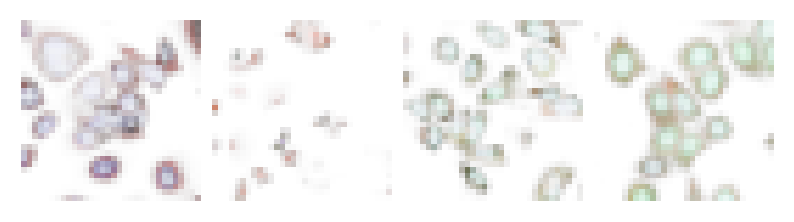

In [ ]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np

# 拿到一個 batch（注意：custom_collate_fn 回傳的是 dict）
for batch in train_loader:
    images = batch["images"]
    labels = batch["class_labels"]

    # 只取前 4 張
    imgs = images[:4]
    grid = torchvision.utils.make_grid(imgs, nrow=4)

    print("Label shape:", labels.shape)

    # 把 tensor 轉為 numpy 並顯示圖像
    npimg = grid.numpy()
    plt.figure(figsize=(10, 3))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # C, H, W → H, W, C
    plt.axis('off')
    plt.show()

    break


# Diffusion model


## implementation

In [ ]:
def get_num_groups(out_channels: int) -> int:
    for g in [8, 4, 2, 1]:
        if out_channels % g == 0:
            return g
    return 1  # fallback


In [ ]:
class Conv(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn = nn.GroupNorm(get_num_groups(out_channels), out_channels)
        self.gelu = nn.GELU()


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        x = self.bn(x)
        x = self.gelu(x)

        return x


class DownConv(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1)
        self.bn = nn.GroupNorm(get_num_groups(out_channels), out_channels)
        self.gelu = nn.GELU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        x = self.bn(x)
        x = self.gelu(x)

        return x


class UpConv(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.conv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1)
        self.bn = nn.GroupNorm(get_num_groups(out_channels), out_channels)
        self.gelu = nn.GELU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        x = self.bn(x)
        x = self.gelu(x)

        return x


class Flatten(nn.Module):
    def __init__(self):
        super().__init__()
        self.avg_pool = nn.AvgPool2d(7)
        self.gelu = nn.GELU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.avg_pool(x)
        x = self.gelu(x)
        x = x.view(x.shape[0], -1)
        return x


class Unflatten(nn.Module):
    def __init__(self, in_channels: int):
        super().__init__()
        self.conv = nn.ConvTranspose2d(in_channels, in_channels, kernel_size=7, stride=7, padding=0)
        self.bn = nn.GroupNorm(get_num_groups(in_channels), in_channels)
        self.gelu = nn.GELU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        x = self.bn(x)
        x = self.gelu(x)
        return x


class ConvBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.conv1 = Conv(in_channels, out_channels)
        self.conv2 = Conv(out_channels, out_channels)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv1(x)
        x = self.conv2(x)
        return x

class DownBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.conv = DownConv(in_channels, out_channels)
        self.block = ConvBlock(out_channels, out_channels)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        x = self.block(x)
        return x



class UpBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.conv = UpConv(in_channels, out_channels)
        self.block = ConvBlock(out_channels, out_channels)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        x = self.block(x)
        return x

class FCBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super().__init__()
        self.fc1 = nn.Linear(in_channels, out_channels)
        self.gelu = nn.GELU()
        self.fc2 = nn.Linear(out_channels, out_channels)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.gelu(x)
        x = self.fc2(x)
        return x


In [ ]:
class ClassConditionalUNet(nn.Module):
    def __init__(
        self,
        in_channels: int,
        num_timesteps: int,
        num_classes: int,
        num_hiddens: int
    ):
        super().__init__()
        self.num_hiddens = num_hiddens
        self.num_classes = num_classes
        self.num_timesteps = num_timesteps
        self.covblock1 = ConvBlock(in_channels, num_hiddens)
        self.downblock1 = DownBlock(num_hiddens, num_hiddens)
        self.downblock2 = DownBlock(num_hiddens, 2 * num_hiddens)
        self.flatten = nn.Flatten(start_dim=1)

        dummy_input = torch.zeros(1, in_channels, 32, 32)
        with torch.no_grad():
            xd1 = self.covblock1(dummy_input)
            xd2 = self.downblock1(xd1)
            xd3 = self.downblock2(xd2)
            x_flat = xd3.view(1, -1)
            in_dim = x_flat.shape[1]
            C, H, W = xd3.shape[1:]

        self.unflatten = nn.Unflatten(1, (C, H, W))
        self.flatten_fc = None
        # self.unflatten = None

        self.upblock1 = UpBlock(4 * num_hiddens, num_hiddens)
        self.upblock2 = UpBlock(2 * num_hiddens, num_hiddens)
        self.convblock2 = ConvBlock(2 * num_hiddens, num_hiddens)
        self.conv = Conv(num_hiddens, in_channels)
        self.fc2_t = FCBlock(1, num_hiddens)
        self.fc2_c = FCBlock(num_classes, num_hiddens)
        self.fc3_t = FCBlock(1, 2*num_hiddens)
        self.fc3_c = FCBlock(num_classes, 2*num_hiddens)

    def forward(
        self,
        x: torch.Tensor,
        c: torch.Tensor,
        t: torch.Tensor,
        mask: torch.Tensor | None = None,
    ) -> torch.Tensor:
        """
        Args:
            x: (N, C, H, W) input tensor.
            c: (N,) int64 condition tensor.
            t: (N,) normalized time tensor.
            mask: (N,) mask tensor. If not None, mask out condition when mask == 0.

        Returns:
            (N, C, H, W) output tensor.
        """
        # assert x.shape[-2:] == (28, 28), "Expect input shape to be (28, 28)."
        # print(f"x.shape: {x.shape}, c.shape: {c.shape}, t.shape: {t.shape}")
        # print("fc3_c:", self.fc3_c)
        # print("c.shape:", c.shape)
        # print("fc3_c output shape:", self.fc3_c(c).shape)

        xd1 = self.covblock1(x)
        xd2 = self.downblock1(xd1)
        xd3 = self.downblock2(xd2)

        # B, C, H, W = xd3.shape
        x_flat = self.flatten(xd3)
        if self.flatten_fc is None:
            in_dim = x_flat.shape[1]
            self.flatten_fc = nn.Linear(in_dim, in_dim).to(x.device)
            # C, H, W = xd3.shape[1:]
            # self.unflatten = nn.Unflatten(1, (C, H, W))

        x_flat = self.flatten_fc(x_flat)

        t = t.view(-1, 1).float()
        t = t/self.num_timesteps

        c = c.float()
        if mask is not None:
            c = c * mask.view(-1, 1)

        xu3 = self.unflatten(x_flat)



        ft3 = self.fc3_t(t) * 0.1
        ft3 = ft3.unsqueeze(-1).unsqueeze(-1)
        c3 = self.fc3_c(c) * 1.0
        c3 = c3.unsqueeze(-1).unsqueeze(-1)

        # print("c3 shape:", c3.shape)
        # print("xu3 shape:", xu3.shape)
        # print("ft3 shape:", ft3.shape)
        xu3 = c3 * xu3 + ft3
        xc3 = torch.cat([xu3, xd3], dim=1)

        xu2 = self.upblock1(xc3)
        ft2 = self.fc2_t(t) * 0.1
        ft2 = ft2.unsqueeze(-1).unsqueeze(-1)
        c2 = self.fc2_c(c) * 1.0
        c2 = c2.unsqueeze(-1).unsqueeze(-1)
        xu2 = c2 * xu2 + ft2
        xc2 = torch.cat([xu2, xd2], dim=1)

        xu1 = self.upblock2(xc2)
        xc1 = torch.cat([xu1, xd1], dim=1)
        f = self.convblock2(xc1)
        output = self.conv(f)
        return output

In [ ]:
import math
def ddpm_forward(
    unet: ClassConditionalUNet,
    ddpm_schedule: dict,
    x_0: torch.Tensor,
    c: torch.Tensor,
    p_uncond: float,
    num_ts: int,
) -> torch.Tensor:
    """Algorithm 1 of the DDPM paper.

    Args:
        unet: ClassConditionalUNet
        ddpm_schedule: dict
        x_0: (N, C, H, W) input tensor.
        c: (N,) int64 condition tensor.
        p_uncond: float, probability of unconditioning the condition.
        num_ts: int, number of timesteps.

    Returns:
        (,) diffusion loss.
    """
    unet.train()
    # YOUR CODE HERE.
    t = torch.randint(0, num_ts, (x_0.shape[0],), device=x_0.device)

    alpha_bars = ddpm_schedule['alpha_bars']
    alpha_bar_t = alpha_bars[t].view(-1, 1, 1, 1)

    mask = None
    if p_uncond > 0:
        mask = (torch.rand(c.shape[0], device=c.device) > p_uncond).float()


    epsilons = torch.randn_like(x_0)
    xt = torch.sqrt(alpha_bar_t ) * x_0 + torch.sqrt(1 - alpha_bar_t ) * epsilons


    output = unet(xt, c, t, mask)
    per_sample_loss = ((output - epsilons) ** 2).mean(dim=(1, 2, 3))  # (N,)

    weights = 1 + torch.cos((t.float() / num_ts) * math.pi)  # (N,)
    weights = weights / weights.mean()  # normalize
    loss = (per_sample_loss * weights).mean()


    return loss


In [ ]:
def ddpm_schedule(beta1: float, beta2: float, num_ts: int) -> dict:
    """Constants for DDPM training and sampling.

    Arguments:
        beta1: float, starting beta value.
        beta2: float, ending beta value.
        num_ts: int, number of timesteps.

    Returns:
        dict with keys:
            betas: linear schedule of betas from beta1 to beta2.
            alphas: 1 - betas.
            alpha_bars: cumulative product of alphas.
    """
    assert beta1 < beta2 < 1.0, "Expect beta1 < beta2 < 1.0."

    betas = torch.linspace(beta1, beta2, num_ts)
    alphas = 1.0 - betas
    alpha_bars = torch.cumprod(alphas, dim=0)

    return {
        "betas": nn.Parameter(betas, requires_grad=False),
        "alphas": nn.Parameter(alphas, requires_grad=False),
        "alpha_bars": nn.Parameter(alpha_bars, requires_grad=False),
    }

In [ ]:
class DDPM(nn.Module):
    def __init__(
        self,
        unet: ClassConditionalUNet,
        betas: tuple[float, float] = (1e-4, 0.02),
        num_ts: int = 300,
        p_uncond: float = 0.1,
    ):
        super().__init__()
        self.unet = unet
        self.betas = betas
        self.num_ts = num_ts
        self.p_uncond = p_uncond
        self.ddpm_schedule = nn.ParameterDict(ddpm_schedule(betas[0], betas[1], num_ts))

    def forward(self, x: torch.Tensor, c: torch.Tensor) -> torch.Tensor:
        """
        Args:
            x: (N, C, H, W) input tensor.
            c: (N,) int64 condition tensor.

        Returns:
            (,) diffusion loss.
        """
        return ddpm_forward(
            self.unet, self.ddpm_schedule, x, c, self.p_uncond, self.num_ts
        )

    @torch.inference_mode()
    def sample(
        self,
        c: torch.Tensor,
        img_wh: tuple[int, int],
        guidance_scale: float = 5.0,
        seed: int = 0,
    ):
        return ddpm_sample(
            self.unet, self.ddpm_schedule, c, img_wh, self.num_ts, guidance_scale, seed
        )

## training

In [ ]:
@torch.inference_mode()
def ddpm_sample(
    unet: ClassConditionalUNet,
    ddpm_schedule: dict,
    c: torch.Tensor,
    img_wh: tuple[int, int],
    num_ts: int,
    guidance_scale: float = 5.0,
    seed: int = 0,
) -> torch.Tensor:
    """Algorithm 2 of the DDPM paper with classifier-free guidance.

    Args:
        unet: ClassConditionalUNet
        ddpm_schedule: dict
        c: (N,) int64 condition tensor. Only for class-conditional
        img_wh: (H, W) output image width and height.
        num_ts: int, number of timesteps.
        guidance_scale: float, CFG scale.
        seed: int, random seed.

    Returns:
        (N, C, H, W) final sample.
        (N, T_animation, C, H, W) caches.
    """
    unet.eval()
    # YOUR CODE HERE.
    torch.manual_seed(seed)
    x = torch.randn((c.shape[0], 4, img_wh[0], img_wh[1])).to(device)

    alpha_bars = ddpm_schedule['alpha_bars']
    alphas = ddpm_schedule['alphas']
    betas = ddpm_schedule['betas']

    for t in reversed(range(num_ts)):
        z = torch.randn_like(x) if t > 0 else torch.zeros_like(x)
        t_tensor = torch.full((x.shape[0],), t, device=x.device)

        c_zero = torch.zeros_like(c)
        eps_theta_u = unet(x, c_zero, t_tensor)
        eps_theta_c = unet(x, c, t_tensor)
        eps_theta = eps_theta_u + guidance_scale * (eps_theta_c - eps_theta_u)

        x_head_0 = 1/torch.sqrt(alpha_bars[t]) * (x - torch.sqrt(1 - alpha_bars[t]) * eps_theta)

        if t > 0:
          coef1 = (torch.sqrt(alpha_bars[t - 1]) * betas[t]) / (1 - alpha_bars[t])
          coef2 = (torch.sqrt(alphas[t]) * (1 - alpha_bars[t - 1])) / (1 - alpha_bars[t])
          x = coef1 * x_head_0 + coef2 * x + torch.sqrt(betas[t]) * z

        else:
          x = x_head_0


    return x


In [ ]:
@torch.inference_mode()
def prepare_model_for_sampling(model: DDPM, img_wh=(128, 128)):
    B = 1
    C = 4
    H, W = img_wh
    x_dummy = torch.randn((B, C, H, W), device=next(model.parameters()).device)
    c_dummy = torch.zeros((B, model.unet.num_classes), device=x_dummy.device)
    t_dummy = torch.tensor([0], device=x_dummy.device)

    _ = model.unet(x_dummy, c_dummy, t_dummy)


In [ ]:
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

unet = ClassConditionalUNet(
    in_channels=4,
    num_timesteps=100,
    num_classes=train_dataset.num_classes,
    num_hiddens=128
)

model = DDPM(unet).to(device)

accum_steps = 2
epochs = 100

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
scaler = torch.cuda.amp.GradScaler()

resume_path = "none"

if os.path.exists(resume_path):
    checkpoint = torch.load(resume_path, map_location=device)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    scaler.load_state_dict(checkpoint["scaler_state_dict"])
    start_epoch = checkpoint["epoch"]
    train_losses = checkpoint.get("train_losses", [])
    val_losses = checkpoint.get("val_losses", [])
    print(f"✅ Resumed from epoch {start_epoch}")
else:
    start_epoch = 0
    train_losses, val_losses = [], []



<ipython-input-20-86e3e87d28d5>:21: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


In [ ]:
patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0
early_stop_triggered = False


for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    pbar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{epochs} [Train]")

    optimizer.zero_grad()

    for i, batch in pbar:
        x = batch["images"].to(device)
        c = batch["class_labels"].float().to(device)

        with torch.cuda.amp.autocast():
            loss = model(x, c) / accum_steps
        scaler.scale(loss).backward()

        if (i + 1) % accum_steps == 0 or (i + 1) == len(train_loader):
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            torch.cuda.empty_cache()

        total_loss += loss.item() * accum_steps
        pbar.set_postfix(loss=loss.item() * accum_steps)

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"[Epoch {epoch+1}] Train Avg Loss: {avg_train_loss:.4f}")

    # === Validation ===
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/10 [Val]"):
            x = batch["images"].to(device)
            c = batch["class_labels"].float().to(device)
            loss = model(x, c)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"[Epoch {epoch+1}] Val Avg Loss: {avg_val_loss:.4f}")

    # === Sampling ===
    prepare_model_for_sampling(model, img_wh=image_size)

    for sample_batch in val_loader:
        c_sample = sample_batch["class_labels"].float().to(device)
        break  #  batch

    generated = ddpm_sample(
        unet=model.unet,
        ddpm_schedule=model.ddpm_schedule,
        c=c_sample[:4],
        img_wh=image_size,
        num_ts=model.num_ts,
        guidance_scale=5.0,
        seed=epoch
    )

    for i in range(min(4, generated.shape[0])):
        fig, axes = plt.subplots(1, 4, figsize=(12, 3))
        for ch in range(4):
            axes[ch].imshow(generated[i, ch].cpu(), cmap='gray')
            axes[ch].set_title(f"Channel {ch}")
            axes[ch].axis('off')
        plt.suptitle(f"Sample {i}")
        plt.show()

    # === Save Model ===
    save_dir = "/content/drive/Shareddrives/CS444 DLCV 抱團/Final Project/model/diffusion/"
    os.makedirs(save_dir, exist_ok=True)
    checkpoint = {
        "epoch": epoch + 1,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "scaler_state_dict": scaler.state_dict(),
        "train_losses": train_losses,
        "val_losses": val_losses,
    }
    torch.save(checkpoint, os.path.join(save_dir, f"checkpoint_epoch{epoch+1}.pt"))
    scheduler.step()

    # === Early Stopping Check ===
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epoch(s)")

    if epochs_no_improve >= patience:
        print(f"Early stopping triggered at epoch {epoch+1}")
        early_stop_triggered = True
        break  # 跳出 epoch loop




plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DDPM Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
torch.save(model.state_dict(), os.path.join('/content/drive/Shareddrives/CS444 DLCV 抱團/Final Project/model/diffusion/', f"ddpm_epoch{epoch+1}.pt"))

### sampling

In [ ]:
# # === Step 1: Initialize components as before ===
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# unet = ClassConditionalUNet(
#     in_channels=4,
#     num_timesteps=100,
#     num_classes=train_dataset.num_classes,
#     num_hiddens=128
# )
# model = DDPM(unet).to(device)

# optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
# scaler = torch.cuda.amp.GradScaler()

# # === Step 2: Load checkpoint ===
# checkpoint = torch.load("/content/drive/Shareddrives/CS444 DLCV 抱團/Final Project/model/diffusion/checkpoint_epoch40.pt", map_location=device)

# model.load_state_dict(checkpoint["model_state_dict"], strict=False)
# # optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
# # scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
# # scaler.load_state_dict(checkpoint["scaler_state_dict"])

# # start_epoch = checkpoint["epoch"]
# # train_losses = checkpoint["train_losses"]
# # val_losses = checkpoint["val_losses"]

# print(f"✅ Loaded checkpoint from epoch {start_epoch}")


In [ ]:
c.shape

torch.Size([4, 28])

In [ ]:
prepare_model_for_sampling(model, img_wh=image_size)
target_class = 10
c = torch.zeros(c.shape, device=device)  # shape: (B=1, num_classes=28)
c[:, target_class] = 1.0

generated = ddpm_sample(
    unet=model.unet,
    ddpm_schedule=model.ddpm_schedule,
    c=c,
    img_wh=image_size,
    num_ts=model.num_ts,
    guidance_scale=5.0,
    seed=42
)


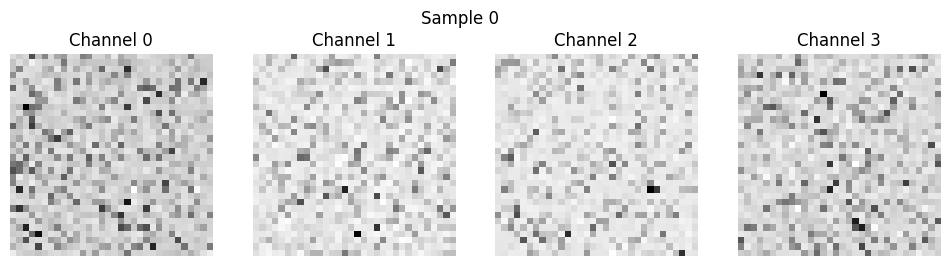

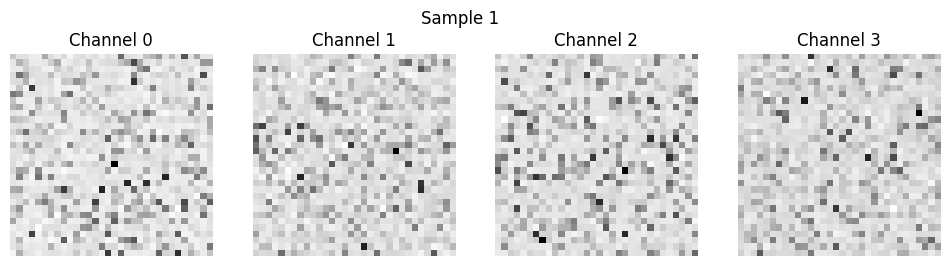

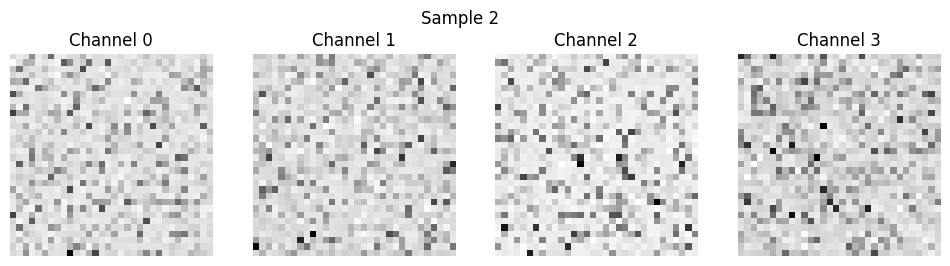

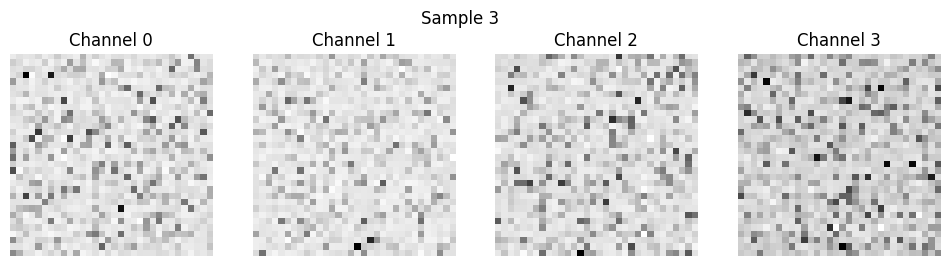

In [ ]:
for i in range(min(4, generated.shape[0])):
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    for ch in range(4):
        axes[ch].imshow(generated[i, ch].cpu(), cmap='gray')
        axes[ch].set_title(f"Channel {ch}")
        axes[ch].axis('off')
    plt.suptitle(f"Sample {i}")
    plt.show()


## sample

In [ ]:
@torch.inference_mode()
def ddpm_reconstruct_from_xt(
    unet: ClassConditionalUNet,
    ddpm_schedule: dict,
    x_0: torch.Tensor,
    c: torch.Tensor,
    t_start: int,
    guidance_scale: float = 5.0,
) -> torch.Tensor:
    """Start from x_0, add noise at timestep t_start, then denoise it all the way back."""
    device = x_0.device
    alpha_bars = ddpm_schedule["alpha_bars"]
    alphas = ddpm_schedule["alphas"]
    betas = ddpm_schedule["betas"]

    B = x_0.shape[0]

    # === 1. Add noise to x_0 ===
    alpha_bar_t = alpha_bars[t_start].to(device)
    eps = torch.randn_like(x_0)
    x_t = (alpha_bar_t.sqrt() * x_0 +
           (1 - alpha_bar_t).sqrt() * eps)

    x = x_t

    # === 2. Run reverse process from timestep t_start ===
    for t in reversed(range(t_start + 1)):
        t_tensor = torch.full((B,), t, device=device)
        z = torch.randn_like(x) if t > 0 else torch.zeros_like(x)

        c_zero = torch.zeros_like(c)
        eps_theta_u = unet(x, c_zero, t_tensor)
        eps_theta_c = unet(x, c, t_tensor)
        eps_theta = eps_theta_u + guidance_scale * (eps_theta_c - eps_theta_u)

        x_head_0 = 1 / alpha_bars[t].sqrt() * (x - (1 - alpha_bars[t]).sqrt() * eps_theta)

        if t > 0:
            coef1 = (alpha_bars[t - 1].sqrt() * betas[t]) / (1 - alpha_bars[t])
            coef2 = (alphas[t].sqrt() * (1 - alpha_bars[t - 1])) / (1 - alpha_bars[t])
            x = coef1 * x_head_0 + coef2 * x + betas[t].sqrt() * z
        else:
            x = x_head_0

    return x


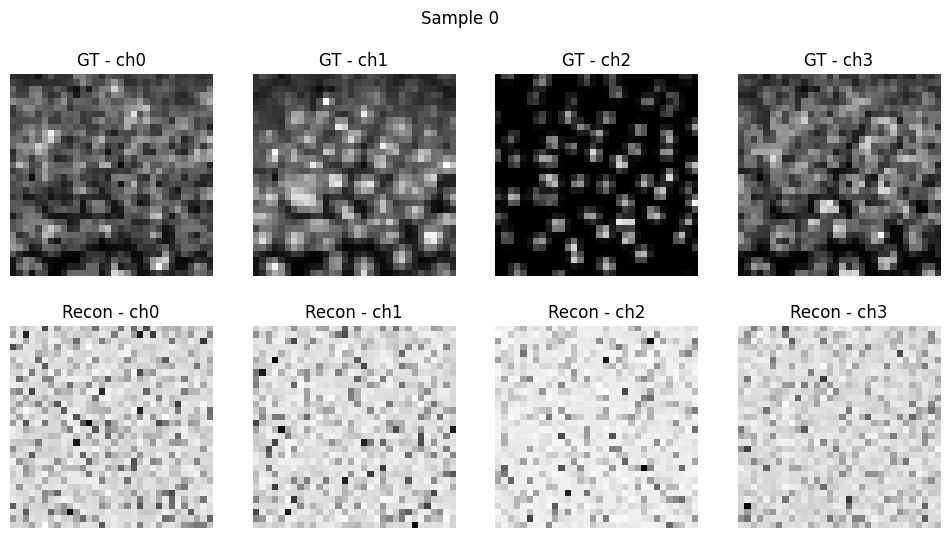

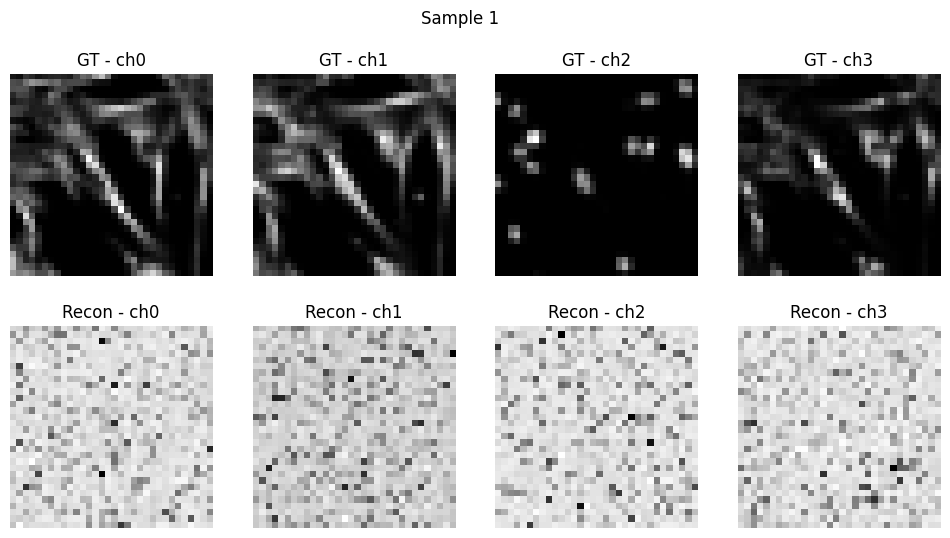

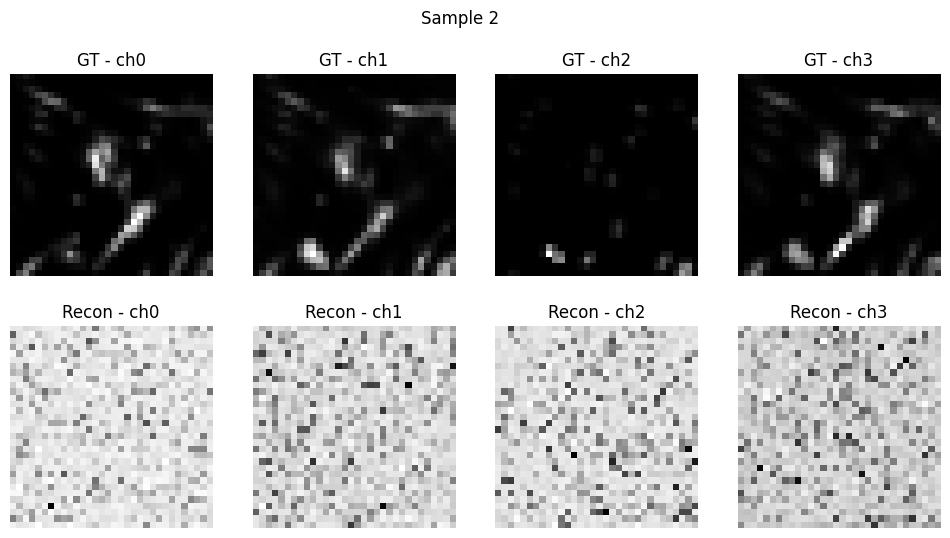

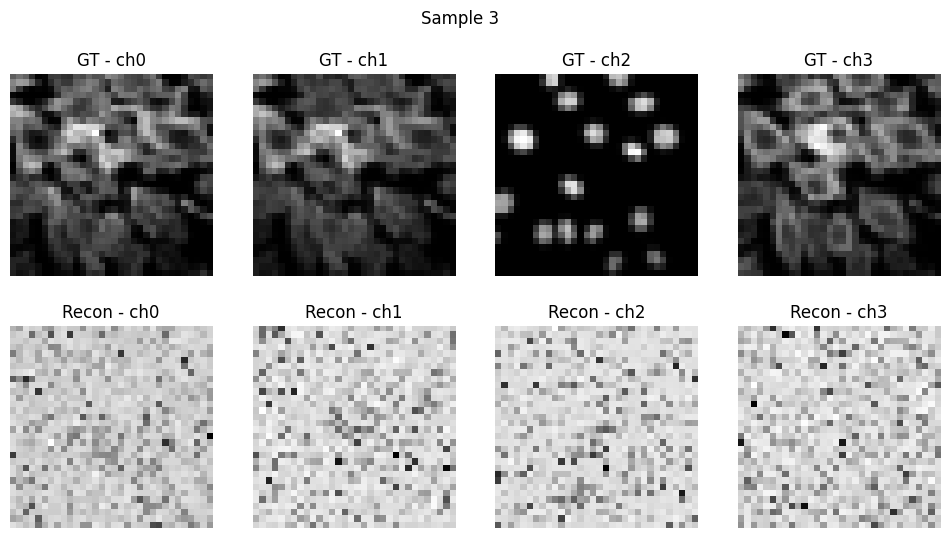

In [ ]:

sample = next(iter(train_loader))
x0 = sample["images"].to(device)[:4]
c = sample["class_labels"].float().to(device)[:4]


x_gen = ddpm_reconstruct_from_xt(
    model.unet,
    model.ddpm_schedule,
    x_0=x0,
    c=c,
    t_start=150,
    guidance_scale=5.0
)


for i in range(x0.shape[0]):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    for ch in range(4):
        axes[0][ch].imshow(x0[i, ch].cpu(), cmap='gray')
        axes[0][ch].set_title(f"GT - ch{ch}")
        axes[0][ch].axis('off')
        axes[1][ch].imshow(x_gen[i, ch].cpu(), cmap='gray')
        axes[1][ch].set_title(f"Recon - ch{ch}")
        axes[1][ch].axis('off')
    plt.suptitle(f"Sample {i}")
    plt.show()
